# Visualização
-------------

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Base de Dados

In [5]:
path = '/content/drive/MyDrive/Estatistica_Para_Ciencia_De_Dados/Bases de dados/census.csv'

In [6]:
dataset = pd.read_csv(path)
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Gráfico de dispersão

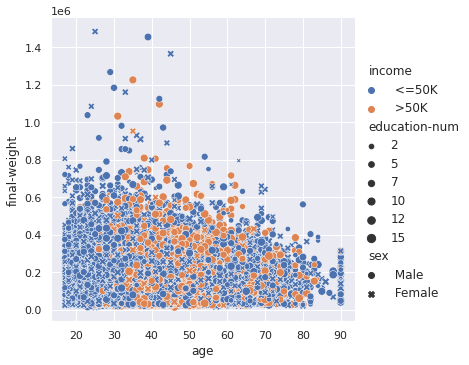

In [7]:
sns.relplot(x='age', y='final-weight', data=dataset,
            hue='income', # Agrupamento
            style='sex',
            size='education-num'
            );

## Gráfico de barra e setor (pizza)

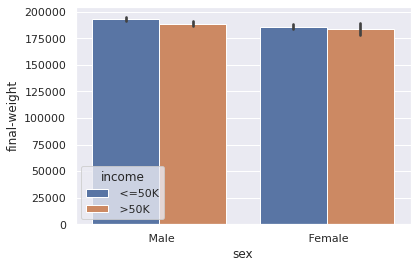

In [8]:
sns.barplot(x='sex', y='final-weight', data=dataset,
            hue='income');

In [9]:
dados_agrupados = dataset.groupby(['income'])['education-num'].sum()
dados_agrupados

income
 <=50K    237190
 >50K      91047
Name: education-num, dtype: int64

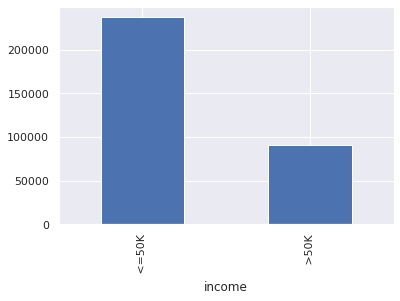

In [10]:
dados_agrupados.plot.bar();

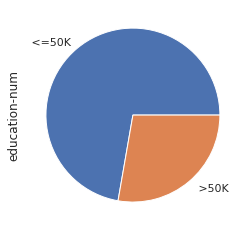

In [11]:
dados_agrupados.plot.pie();

## Gráfico de linha

In [12]:
vendas = {'mes': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
          'valor': np.array([100, 200, 120, 300, 500, 198, 200, 209, 130, 500, 300, 120])}

In [13]:
vendas_df = pd.DataFrame(vendas)
vendas_df

,mes,valor
0,1,100
1,2,200
2,3,120
3,4,300
4,5,500
5,6,198
6,7,200
7,8,209
8,9,130
9,10,500


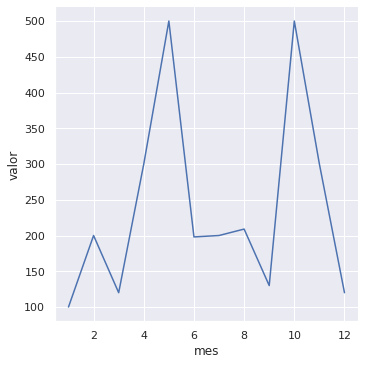

In [14]:
sns.relplot(x='mes', y='valor', kind='line', data=vendas_df);

## Boxplot

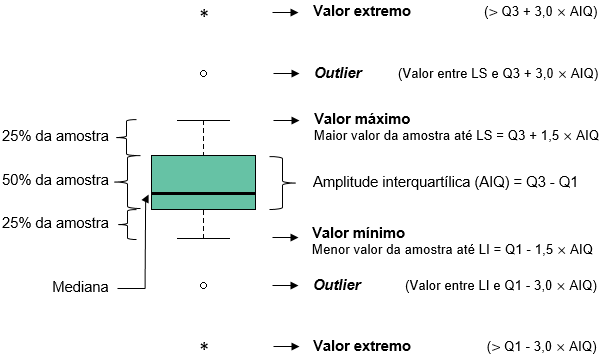

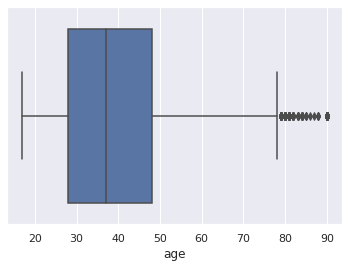

In [15]:
sns.boxplot(data=dataset, x='age');

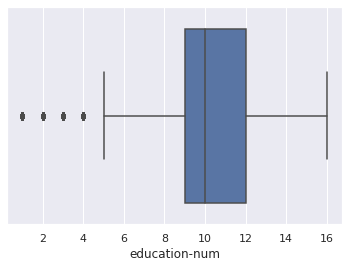

In [16]:
sns.boxplot(data=dataset, x='education-num');

In [17]:
dataset2 = dataset.iloc[:, [0, 4, 12]]
dataset2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


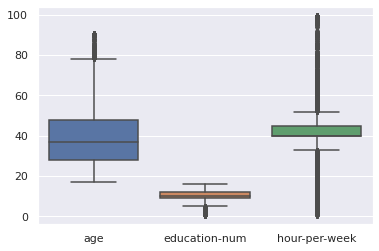

In [18]:
sns.boxplot(data=dataset2);

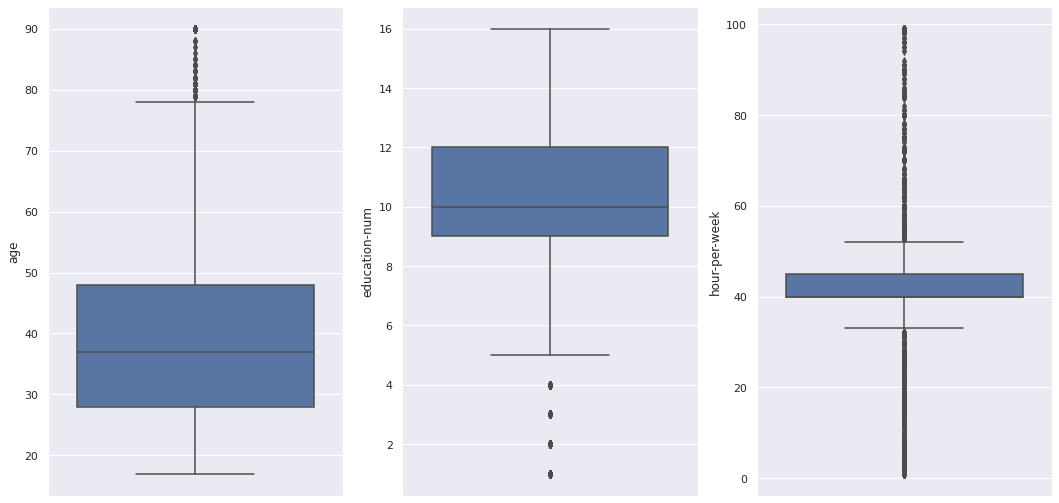

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,9))
sns.boxplot(data=dataset2, y='age', ax=ax1)
sns.boxplot(data=dataset2, y='education-num', ax=ax2)
sns.boxplot(data=dataset2, y='hour-per-week', ax=ax3);

## Gráficos com atributos categóricos

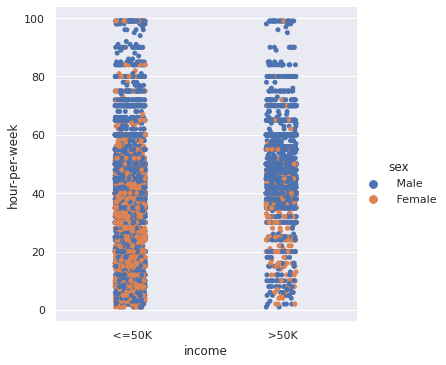

In [20]:
sns.catplot(x='income', y='hour-per-week', data=dataset,
            hue='sex');

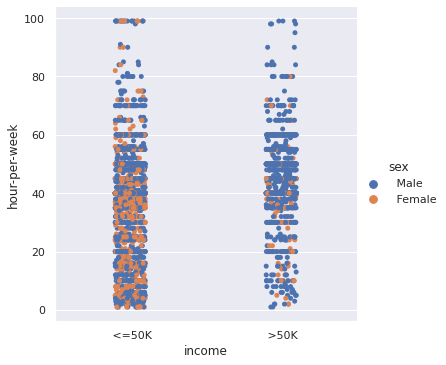

In [21]:
sns.catplot(x='income', y='hour-per-week', data=dataset.query('age > 50'),
            hue='sex');

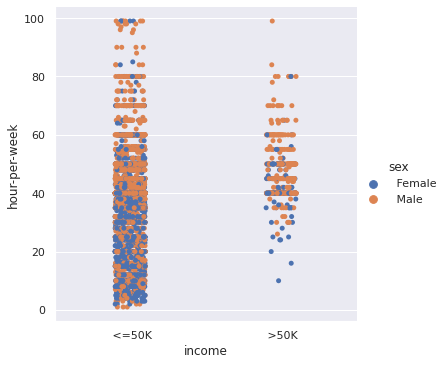

In [22]:
sns.catplot(x='income', y='hour-per-week', data=dataset.query('age < 30'),
            hue='sex');

## Subgráficos

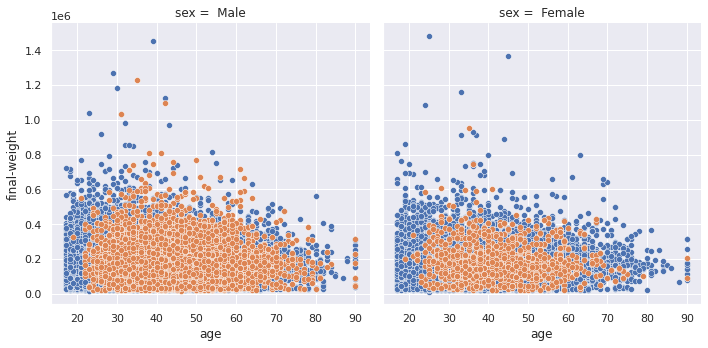

In [23]:
g = sns.FacetGrid(dataset, col='sex', hue='income', height=5)
g.map(sns.scatterplot, 'age', 'final-weight');

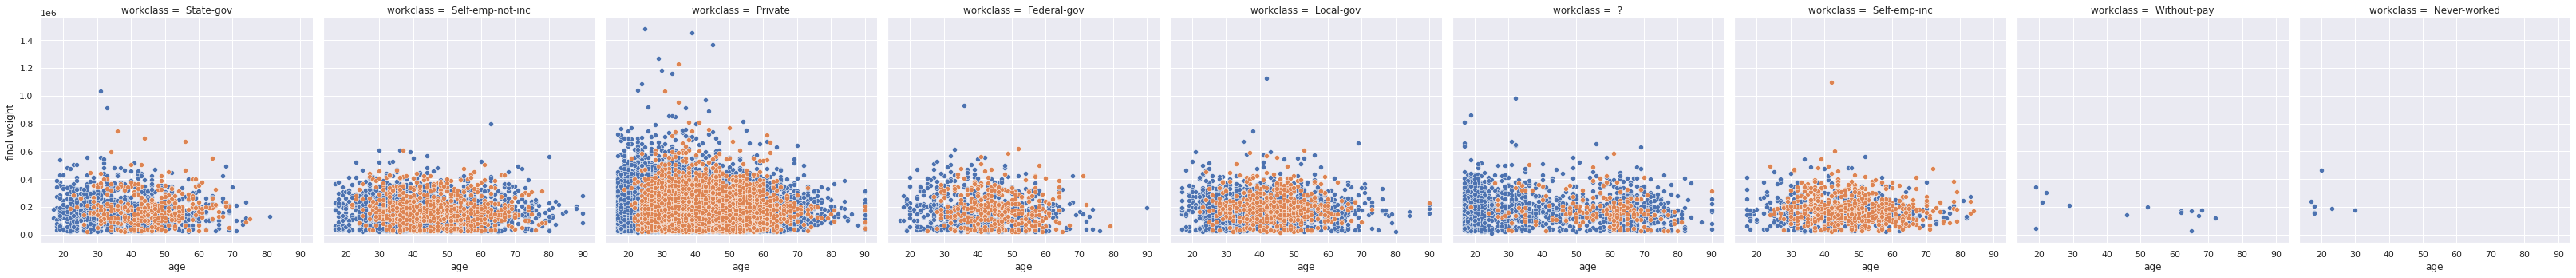

In [24]:
g = sns.FacetGrid(dataset, col='workclass', hue='income', height=5)
g.map(sns.scatterplot, 'age', 'final-weight');

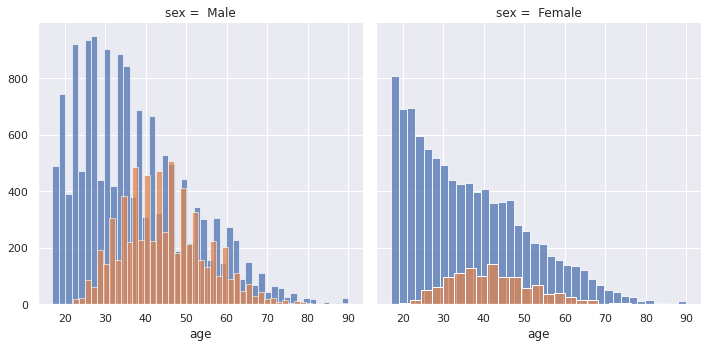

In [25]:
g = sns.FacetGrid(dataset, col='sex', hue='income', height=5)
g.map(sns.histplot, 'age');

In [26]:
dataset2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


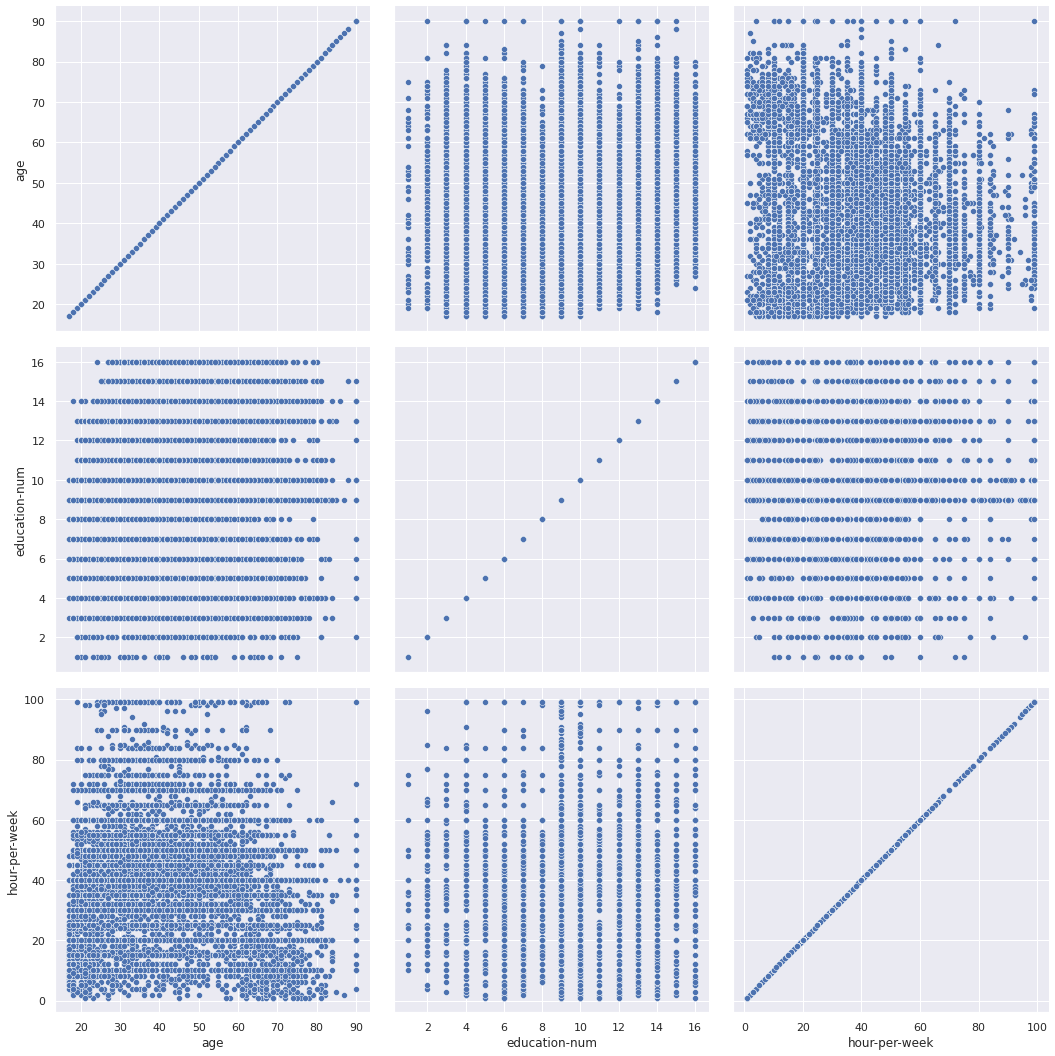

In [27]:
g = sns.PairGrid(dataset2, height=5)
g.map(sns.scatterplot);

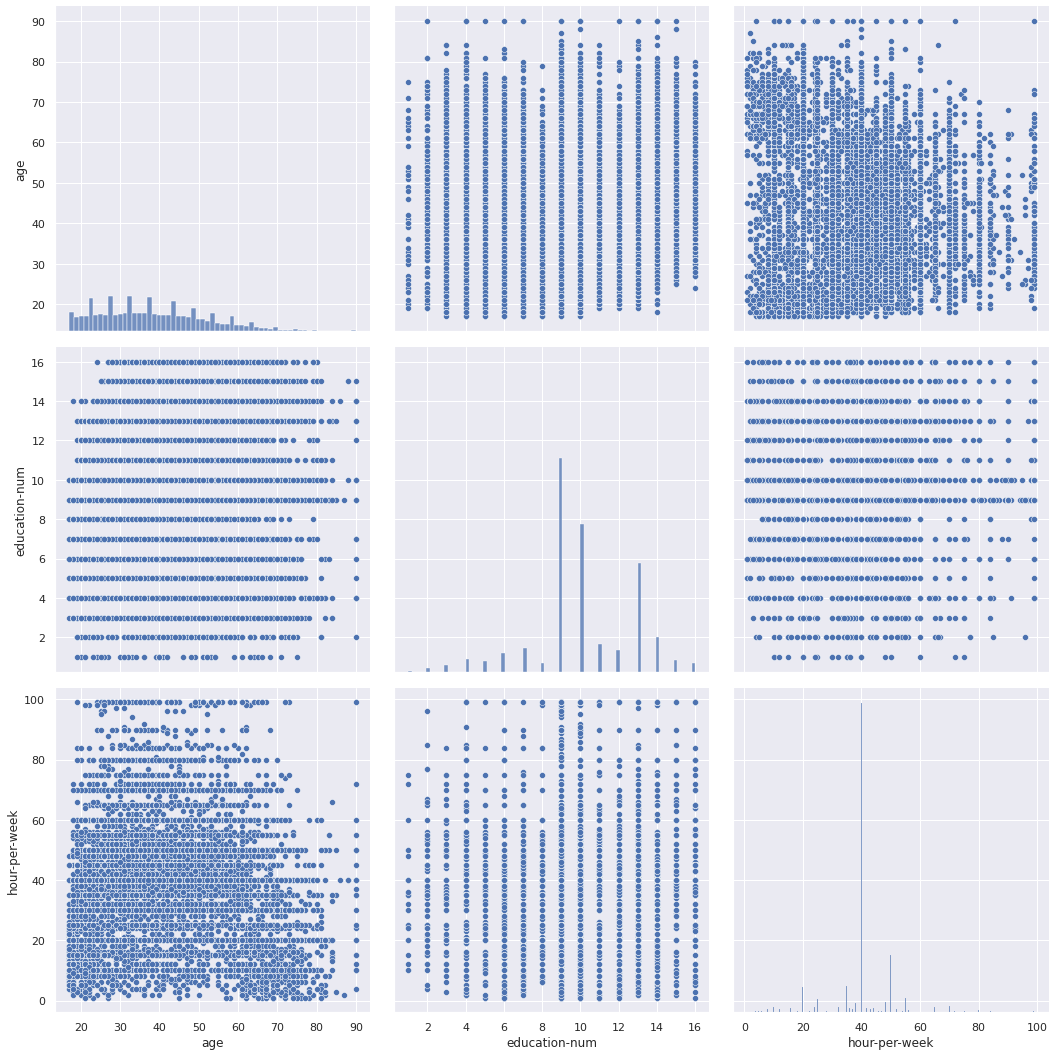

In [28]:
g = sns.PairGrid(dataset2, height=5)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

## Mapa

In [30]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759603 sha256=34b77b555c1f53c1495d7c3c1493bf2f56f63a8b7941a62aba44abf286d63332
  Stored in directory: /tmp/pip-ephem-wheel-cache-ztui4z3o/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [35]:
path = '/content/drive/MyDrive/Estatistica_Para_Ciencia_De_Dados/Bases de dados/house_prices.csv'

In [36]:
dataset = pd.read_csv(path)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [47]:
dataset = dataset.sort_values(by='price', ascending=False)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [49]:
dataset_caros = dataset[:1000]
dataset_caros

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,8965520190,20141030T000000,1200000.0,3,2.50,3420,16622,1.0,0,4,3,10,2410,1010,1991,0,98006,47.5638,-122.105,3460,14566
9925,3623500049,20150501T000000,1200000.0,4,2.25,2320,13114,2.0,0,0,5,8,2320,0,1967,0,98040,47.5762,-122.239,2740,15000
5886,9808590460,20150218T000000,1200000.0,4,2.25,2860,10702,2.0,0,0,3,10,2860,0,1982,0,98004,47.6451,-122.189,2890,10572
19613,7525950110,20140828T000000,1200000.0,4,3.25,3850,19842,2.0,0,3,3,11,3180,670,1989,0,98074,47.6239,-122.065,4320,19500


In [31]:
from mpl_toolkits.basemap import Basemap

In [37]:
dataset['lat'].describe()

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [38]:
dataset['long'].describe()

count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [40]:
lat1, lat2 = dataset['lat'].min(), dataset['lat'].max()
lon1, lon2 = dataset['long'].min(), dataset['long'].max()

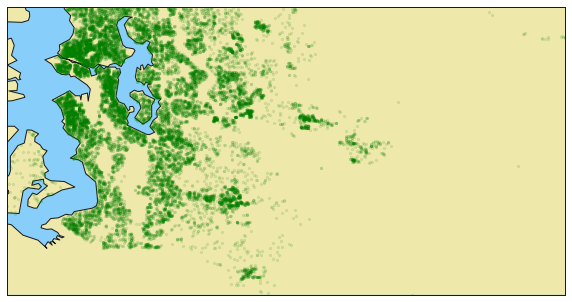

In [48]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=lat1, urcrnrlat=lat2,
            llcrnrlon=lon1, urcrnrlon=lon2)
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')
m.scatter(dataset['long'], dataset['lat'], s=5, c='green', alpha=0.1, zorder=2)

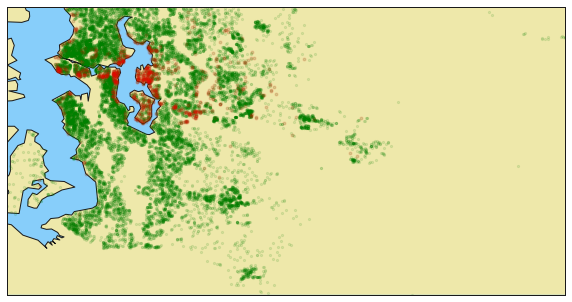

In [50]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=lat1, urcrnrlat=lat2,
            llcrnrlon=lon1, urcrnrlon=lon2)
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')
m.scatter(dataset['long'], dataset['lat'], s=5, c='green', alpha=0.1, zorder=2)
m.scatter(dataset_caros['long'], dataset_caros['lat'], s=10, c='red', alpha=0.1, zorder=23)

In [52]:
dataset_baratos = dataset[-1000:]
dataset_baratos.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19174,2420069220,20141203T000000,209000.0,3,1.0,1320,3954,1.5,0,0,3,6,1320,0,1912,2014,98022,47.2020,-121.994,1270,5184
13595,425000175,20141013T000000,208950.0,3,1.0,960,5700,1.0,0,0,4,5,960,0,1956,0,98056,47.4983,-122.172,960,5700
20819,3336500140,20140919T000000,208800.0,3,2.5,1390,2450,2.0,0,0,3,7,1390,0,2009,0,98118,47.5298,-122.269,1390,2450
303,5104530560,20150401T000000,208633.0,3,2.5,2040,3810,2.0,0,0,3,8,2040,0,2006,0,98038,47.3537,-122.000,2370,4590
19285,844001145,20150326T000000,208500.0,2,1.0,880,4814,1.0,0,0,4,5,880,0,1906,0,98010,47.3107,-121.999,1010,6160


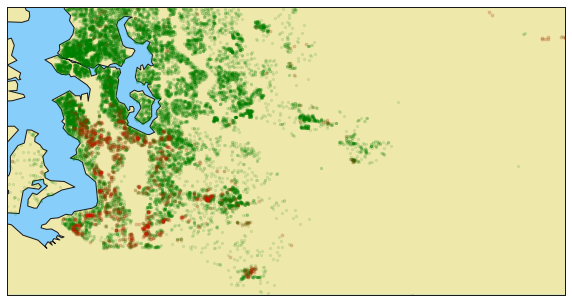

In [53]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=lat1, urcrnrlat=lat2,
            llcrnrlon=lon1, urcrnrlon=lon2)
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')
m.scatter(dataset['long'], dataset['lat'], s=5, c='green', alpha=0.1, zorder=2)
m.scatter(dataset_baratos['long'], dataset_baratos['lat'], s=10, c='red', alpha=0.1, zorder=23)

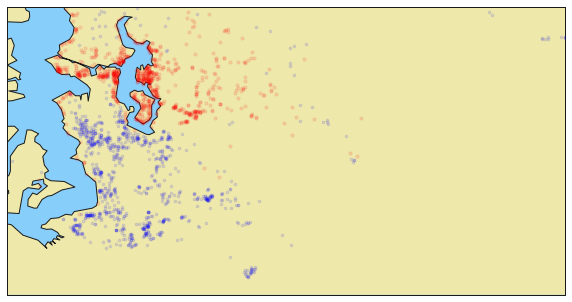

In [55]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=lat1, urcrnrlat=lat2,
            llcrnrlon=lon1, urcrnrlon=lon2)
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')
m.scatter(dataset_caros['long'], dataset_caros['lat'], s=10, c='red', alpha=0.1, zorder=2)
m.scatter(dataset_baratos['long'], dataset_baratos['lat'], s=7, c='blue', alpha=0.1, zorder=23);